In [ ]:
from pathlib import Path
import datetime as dt
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
resolution = 4         # 4 or 12 km
datadir = Path(f"/import/beegfs/CMIP6/wrf_era5/{str(resolution).zfill(2)}km/")
filepattern = f"era5_wrf_dscale_{resolution}km"
chunking = {
    4: [225, 210],
    12: ['auto', 'auto']
}

In [ ]:
def getXY(lat, lon, dataarray):
    abslat = np.abs(dataarray.XLAT-lat)
    abslon = np.abs(dataarray.XLONG-lon)
    # c = np.maximum(abslon, abslat)
    d = abslon**2 + abslat**2
    ([yloc], [xloc]) = np.where(d == np.min(d))
    return xloc, yloc

### Trying out two variables at once

In [ ]:
testdates = ['1990-07-10', '1990-07-11']
test_lon, test_lat = -147.7200, 64.8401 
vars = ['rainc', 'rainnc']

results = []
for testdate in testdates:
    with xr.open_dataset(datadir / f"{testdate[:4]}/{filepattern}_{testdate}.nc") as src:
        xloc, yloc = getXY(test_lat, test_lon, src)
        rain = src[vars].isel(south_north=yloc, west_east=xloc).load().drop_vars(['XLAT', 'XLONG', 'XTIME'])
    results.append(rain)

In [ ]:
xr.concat(results, dim='Time').to_dataframe()

,rainc,rainnc
Time,,
1990-07-10 00:00:00,0.0,0.000000
1990-07-10 01:00:00,0.0,0.000000
1990-07-10 02:00:00,0.0,0.000000
1990-07-10 03:00:00,0.0,0.000000
1990-07-10 04:00:00,0.0,0.000000
1990-07-10 05:00:00,0.0,0.000066
1990-07-10 06:00:00,0.0,0.000633
1990-07-10 07:00:00,0.0,0.003462
1990-07-10 08:00:00,0.0,0.002121


### Example 1: 1967 Flood

In [ ]:
startdate = '1967-07-01'
enddate = '1967-08-31'

test_lon, test_lat = -147.7200, 64.8401         # fairbanks

In [ ]:
dates = pd.date_range(start=startdate, end=enddate, freq='D').strftime('%Y-%m-%d').to_list()
testdate = dates[30]

with xr.open_dataset(datadir / f"{testdate[:4]}/{filepattern}_{testdate}.nc") as src:
    rain = src.rainnc + src.rainc
    rain['Time'] = rain['Time'].to_index() + dt.timedelta(hours=-8)

In [ ]:
rain

<xarray.DataArray (Time: 24, south_north: 450, west_east: 420)> Size: 18MB
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.2397766e-05, 3.8146973e-06, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 1.7501414e-04, 2.1436810e-04, ...,
         3.3611774e-02, 3.3996940e-02, 0.0000000e+00],
        [0.0000000e+00, 1.8461049e-04, 2.3008883e-04, ...,
         3.6242843e-02, 3.6533237e-02, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 2.8133392e-05, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
        [0.0000000e+00, 1.6858608e-02, 1.6930431e-02, ...,
         8.0829382e-02, 7.3737025e-02, 0.0000000e+00],
        [0.0000000e+00, 1.7656565e-02, 1.7394960e-02, ...,
         6.6128731e-02, 5.8234811e-02, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.2874603e-05, 1.2397766e-05, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 4.7683716e-07, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 2.4943471e-02, 2.5230616e-02, ...,
         4.6881914e-02, 2.8324008e-02, 0.0000000e+00],
        [0.0000000e+00, 2.5505662e-02, 2.5379151e-02, ...,
         4.0277719e-02, 1.9823432e-02, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 756kB -164.9 -164.9 ... -128.6
    XLAT     (south_north, west_east) float32 756kB 55.13 55.14 ... 70.53 70.52
    XTIME    (Time) float32 96B 1.8e+03 1.86e+03 1.92e+03 ... 3.12e+03 3.18e+03
  * Time     (Time) datetime64[ns] 192B 1967-07-30T16:00:00 ... 1967-07-31T15...
Dimensions without coordinates: south_north, west_east

In [ ]:
abslat = np.abs(rain.XLAT-test_lat)
abslon = np.abs(rain.XLONG-test_lon)
c = np.maximum(abslon, abslat)
d = abslon**2 + abslat**2

([xloc], [yloc]) = np.where(d == np.min(d))

xloc, yloc

(252, 263)

In [ ]:
concat = []
for testdate in dates:
    with xr.open_dataset(datadir / f"{testdate[:4]}/{filepattern}_{testdate}.nc") as src:
        rain = src.rainnc + src.rainc
        rain['Time'] = rain['Time'].to_index() + dt.timedelta(hours=-8)
    concat.append(rain.isel(south_north=yloc, west_east=yloc))

In [ ]:
all_rain = xr.concat(concat, dim='Time').to_dataframe(name='rain').drop(columns=['XLAT', 'XLONG', 'XTIME'])

<Axes: xlabel='Time', ylabel='rain'>

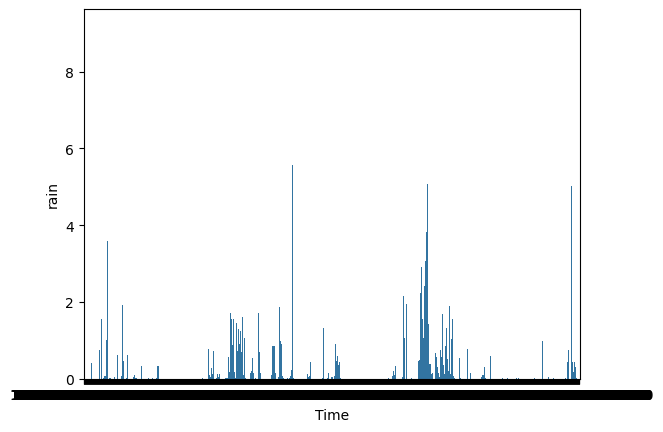

In [ ]:
sns.barplot(all_rain, x=all_rain.index, y='rain')

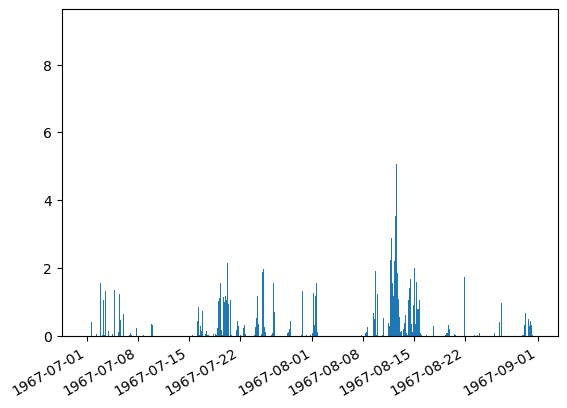

In [ ]:
interval = dt.timedelta(hours=1)     # <----- timedelta of 1 hour

fig, ax = plt.subplots()
ax.bar(all_rain.index, all_rain.rain, width=interval)
fig.autofmt_xdate()

### Comparison w/ NCEI hourly data

In [ ]:
rainDF = pd.read_csv('FAI_PAFA_hourly_precip_NCEI.csv')
rainDF['datetime'] = pd.to_datetime(rainDF.DATE)
rainDF['HPCP'] = rainDF.HPCP.replace(999.99, 0).replace(0.01, 0) * 25.4
rainDF

,STATION,STATION_NAME,DATE,HPCP,datetime
0,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 01:00,0.000,1950-01-01 01:00:00
1,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 11:00,0.762,1950-01-01 11:00:00
2,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 12:00,0.508,1950-01-01 12:00:00
3,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 13:00,0.508,1950-01-01 13:00:00
4,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,19500101 14:00,0.762,1950-01-01 14:00:00
...,...,...,...,...,...
42191,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,20131001 13:00,0.000,2013-10-01 13:00:00
42192,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,20131101 01:00,0.000,2013-11-01 01:00:00
42193,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,20131201 00:00,0.000,2013-12-01 00:00:00
42194,COOP:502968,FAIRBANKS INTERNATIONAL AIRPORT AK US,20131201 01:00,0.000,2013-12-01 01:00:00


In [ ]:
dt.datetime.strptime(startdate, '%Y-%m-%d')

datetime.datetime(1967, 7, 1, 0, 0)

In [ ]:
mask = ((rainDF['datetime'] > dt.datetime.strptime(startdate, '%Y-%m-%d')) & 
        (rainDF['datetime'] <= dt.datetime.strptime(enddate, '%Y-%m-%d')))

In [ ]:
bothDF = rainDF.loc[mask].drop(columns=['STATION', 'STATION_NAME', 'DATE']).set_index('datetime').merge(all_rain, how='left', left_index=True, right_index=True)
bothDF.columns = ['COOP:502968', 'ERA5 4 km']

Text(0, 0.5, 'mm')

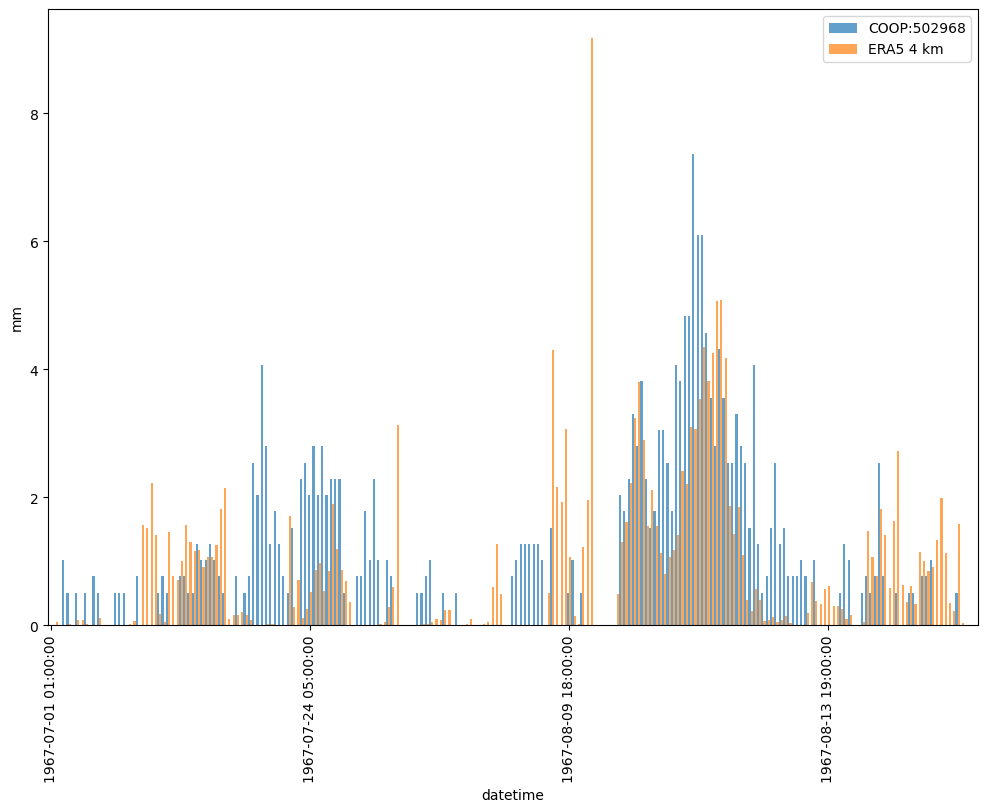

In [ ]:
from matplotlib.ticker import MultipleLocator
fig, ax = plt.subplots(figsize=(12, 8))
bothDF.plot(kind='bar', alpha=0.7, width=1, ax=ax)
ax.xaxis.get_major_locator()                    # <matplotlib.ticker.FixedLocator at 0x2221f657340>
ax.xaxis.get_major_formatter()                  # <matplotlib.ticker.FuncFormatter at 0x2221f8e2a00>

ax.xaxis.set_major_locator(MultipleLocator(60))  # show every 5th tick
plt.ylabel('mm')

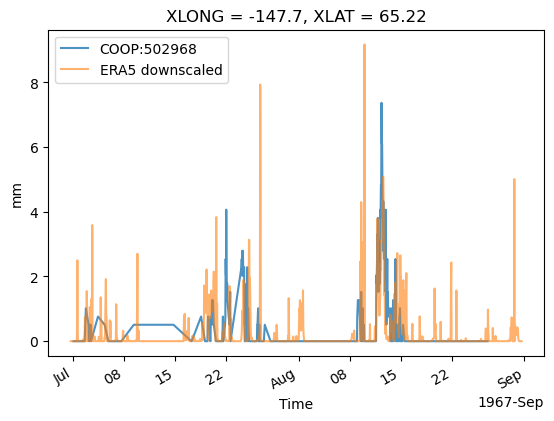

In [ ]:
ax = (rainDF.loc[mask].set_index('datetime').HPCP).plot(label='COOP:502968', alpha=0.8)
xr.concat(concat, dim='Time').plot(ax=ax, alpha=0.6, label='ERA5 downscaled')
plt.ylabel('mm')
plt.legend()